In [101]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization
import visualkeras

In [66]:
labels_csv = pd.read_csv('labels.csv')
labels_csv["id"] = [fname + ".jpg" for fname in labels_csv["id"]]
data_train = pathlib.Path('train')
data_test = pathlib.Path('test')

In [77]:
batch_size = 16
img_size = 224

In [87]:
datagen1 = ImageDataGenerator(preprocessing_function = keras.applications.vgg16.preprocess_input, validation_split=0.2)
datagen2 = ImageDataGenerator(preprocessing_function = keras.applications.resnet50.preprocess_input, validation_split=0.2)
datagen3 = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)

def generate_generator_multiple():
    genX1 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX2 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX3 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0],X3i[0]], X3i[1]  #Yield both images and their mutual label

def generate_generator_multiple2():
    genX1 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX2 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

    genX3 = datagen3.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0],X3i[0]], X3i[1]  #Yield both images and their mutual label

# train_generator1 = datagen1.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset="training",
#                         x_col="id",
#                         y_col="breed",
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode="sparse",
#                         color_mode="rgb",
#                         target_size=(img_size, img_size))
#
# train_generator2 = datagen2.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset="training",
#                         x_col="id",
#                         y_col="breed",
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode="sparse",
#                         color_mode="rgb",
#                         target_size=(img_size, img_size))
#
# train_generator3 = datagen3.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset="training",
#                         x_col="id",
#                         y_col="breed",
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode="sparse",
#                         color_mode="rgb",
#                         target_size=(img_size, img_size))

inputgenerator=generate_generator_multiple()
validation_generator=generate_generator_multiple()

# validation_generator = datagen1.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset="validation",
#                         x_col="id",
#                         y_col="breed",
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode="sparse",
#                         color_mode="rgb",
#                         target_size=(img_size, img_size))

In [88]:
class JoinedGen(tf.keras.utils.Sequence):
    def __init__(self, input_gen1, input_gen2, input_gen3, target_gen):
        self.gen1 = input_gen1
        self.gen2 = input_gen2
        self.gen3 = input_gen3
        self.gen4 = target_gen

        assert len(input_gen1) == len(input_gen2) == len(input_gen3) == len(target_gen)

    def __len__(self):
        return len(self.gen1)

    def __getitem__(self, i):
        x1 = self.gen1[i]
        x2 = self.gen2[i]
        x3 = self.gen3[i]
        y = self.gen4[i]

        return [x1, x2, x3],y

    def on_epoch_end(self):
        self.gen1.on_epoch_end()
        self.gen2.on_epoch_end()
        self.gen3.on_epoch_end()
        self.gen4.on_epoch_end()
        self.gen2.index_array = self.gen1.index_array
        self.gen3.index_array = self.gen1.index_array
        self.gen4.index_array = self.gen1.index_array

In [89]:
vgg16 = applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
resnet50 = keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))
inceptionV3 = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in vgg16 .layers:
    layer.trainable=False
for layer in resnet50.layers:
    layer.trainable=False
for layer in inceptionV3.layers:
    layer.trainable=False

model1 = Sequential()
model2 = Sequential()
model3 = Sequential()

model1.add(vgg16)
model1.add(BatchNormalization())
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(120, activation='softmax'))

model2.add(resnet50)
model2.add(BatchNormalization())
model2.add(GlobalAveragePooling2D())
model2.add(Dropout(0.5))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(120, activation='softmax'))

model3.add(inceptionV3)
model3.add(BatchNormalization())
model3.add(GlobalAveragePooling2D())
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(120, activation='softmax'))

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model1.compile(optimizer=optimizer,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.compile(optimizer=optimizer,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model3.compile(optimizer=optimizer,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
# model1.save('model1.h5')
# model2.save('model2.h5')
# model3.save('model3.h5')

# history_vgg = model1.fit(train_generator, epochs=20, verbose = 1,
#                          validation_data=validation_generator)
#
# history_res = model2.fit(train_generator, epochs=20, verbose = 1,
#                        validation_data=validation_generator)
#
# history_inc = model3.fit(train_generator, epochs=20, verbose = 1,
#                         validation_data=validation_generator)

In [97]:
models = []
models.append(model1)
models.append(model2)
models.append(model3)
ensemble_visible = [model.input for model in models]
ensemble_outputs = [model.output for model in models]
merge = tf.keras.layers.concatenate(ensemble_outputs)
merge = tf.keras.layers.BatchNormalization()(merge)
merge = tf.keras.layers.Dense(1024, activation='relu')(merge)
merge = tf.keras.layers.Dropout(0.5)(merge)
output = tf.keras.layers.Dense(120, activation='softmax')(merge)
ensemble_model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
ensemble_model.compile(optimizer=optimizer,
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
ensemble_model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 vgg16_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['vgg16_input[0][0]']            
                                                                                                  
 batch_normalization_1258 (Batc  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 hNormalization)                                                                                  
                                                                                           

In [98]:
history_ens = ensemble_model.fit(inputgenerator, epochs=20, verbose = 1,
                                 steps_per_epoch = 8178/batch_size,
                                 validation_steps = 2044/batch_size,
                                 validation_data=validation_generator)

Epoch 1/20
512/511 [==============================] - ETA: 0s - loss: 4.5049 - accuracy: 0.0993Found 8178 validated image filenames belonging to 120 classes.
Found 8178 validated image filenames belonging to 120 classes.
Found 8178 validated image filenames belonging to 120 classes.
511/511 [==============================] - 55s 98ms/step - loss: 4.5049 - accuracy: 0.0993 - val_loss: 3.9844 - val_accuracy: 0.3667
Epoch 2/20
511/511 [==============================] - 47s 92ms/step - loss: 3.4234 - accuracy: 0.3348 - val_loss: 1.9470 - val_accuracy: 0.5220
Epoch 3/20
511/511 [==============================] - 47s 92ms/step - loss: 2.1930 - accuracy: 0.4943 - val_loss: 1.0887 - val_accuracy: 0.6724
Epoch 4/20
511/511 [==============================] - 47s 91ms/step - loss: 1.5332 - accuracy: 0.5880 - val_loss: 0.9014 - val_accuracy: 0.7237
Epoch 5/20
511/511 [==============================] - 47s 91ms/step - loss: 1.3247 - accuracy: 0.6303 - val_loss: 0.6977 - val_accuracy: 0.7847
Epoch 6

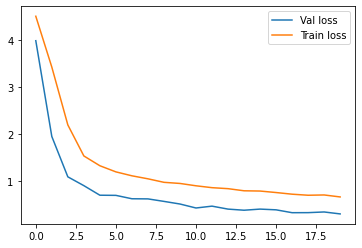

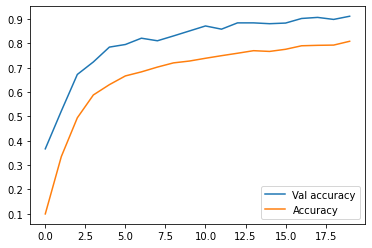

In [99]:
plt.figure()
plt.plot(history_ens .history["val_loss"], label = "Val loss")
plt.plot(history_ens .history["loss"], label = "Train loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_ens .history["val_accuracy"], label = "Val accuracy")
plt.plot(history_ens .history["accuracy"], label = "Accuracy")
plt.legend()
plt.show()

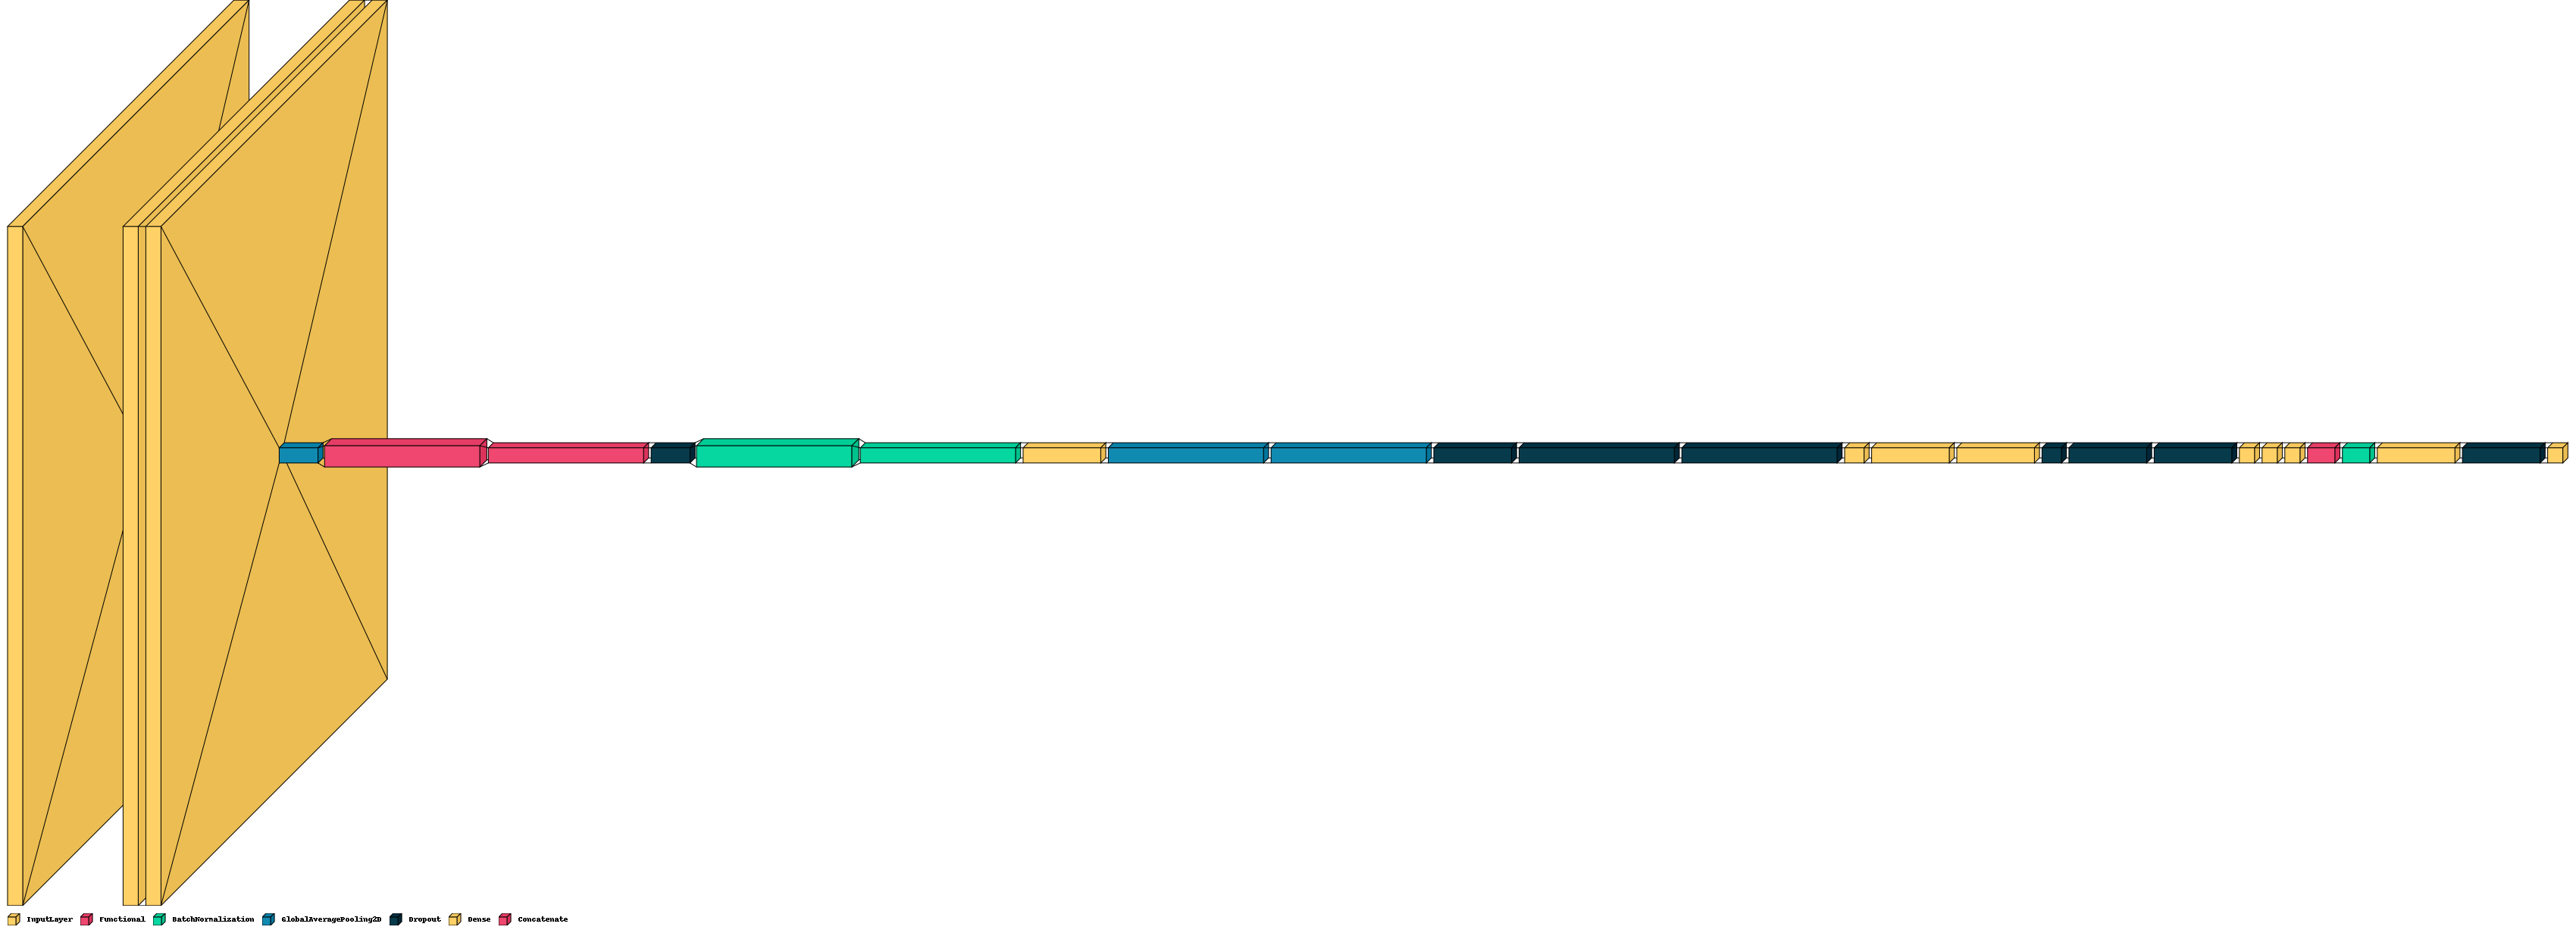

In [102]:
visualkeras.layered_view(ensemble_model,  legend=True)